In [139]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import softmax

import json
import os

In [141]:
# from preprocessing_mio import load_data, get_dataset

In [203]:
matrix = [[1, -0.25, -0.18, -0.2],
[-0.25, 1, -0.17, -0.018],
[-0.18, -0.17, 1, -0.0029],
[-0.2, -0.018, -0.0029, 1]]
matrix_df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd'], index=['1','2','3','4'])

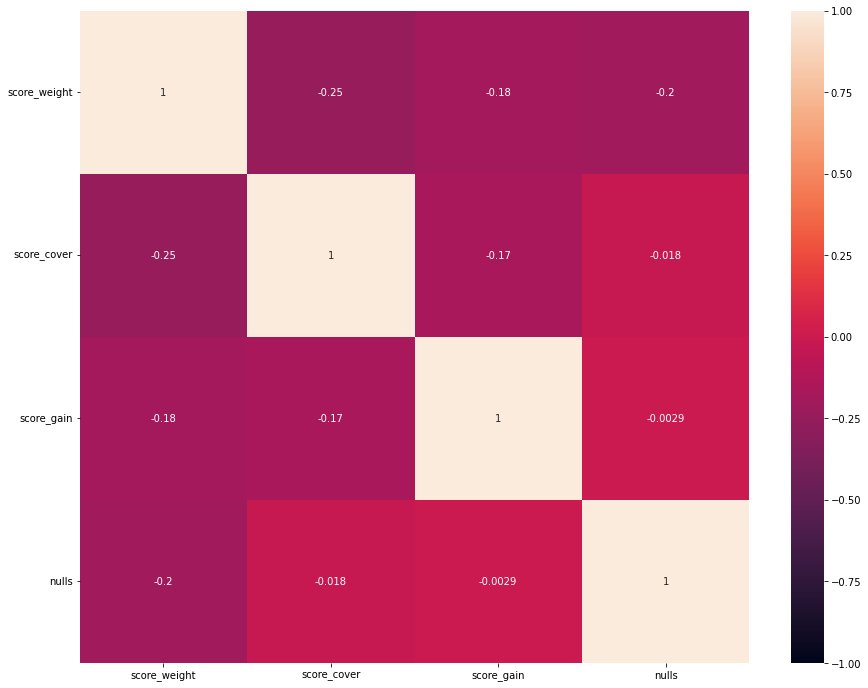

In [207]:
labels = ['score_weight', 'score_cover', 'score_gain', 'nulls']

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(matrix, annot=True, ax=ax, vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0) 
plt.savefig('images/corr_xgboost.png', bbox_inches='tight')
plt.show()

---------------------

# Mejores hiperparametros por modelo

In [147]:
best_hyperparameters_rnn = pd.read_csv('output/rnn/best_hyperparameters.csv')
best_hyperparameters_rnn.sort_values(['model_name', 'split'])

,optimizer,learning_rate,num_layers,num_rnn_layers,num_rnn_nodes,num_dense_nodes,dropout_prob,activation,batch_size,model_name,split
1,Adam,0.000024,NaN,NaN,128,NaN,NaN,NaN,67,baseline_gru,0.0
11,Adam,0.000022,NaN,NaN,128,NaN,NaN,NaN,127,baseline_gru,1.0
21,Adam,0.000245,NaN,NaN,100,NaN,NaN,NaN,73,baseline_gru,2.0
0,Adam,0.000614,NaN,NaN,47,NaN,NaN,NaN,117,baseline_lstm,0.0
10,Adam,0.000051,NaN,NaN,44,NaN,NaN,NaN,128,baseline_lstm,1.0
20,Adam,0.000026,NaN,NaN,58,NaN,NaN,NaN,118,baseline_lstm,2.0
7,Adam,0.000010,NaN,5.0,128,NaN,NaN,NaN,64,gru_stacked,0.0
17,Adam,0.000043,NaN,0.0,128,NaN,NaN,NaN,64,gru_stacked,1.0
27,Adam,0.000084,NaN,0.0,44,NaN,NaN,NaN,64,gru_stacked,2.0
3,SGD,0.001000,4.0,NaN,83,44.0,NaN,tanh,90,gru_stacked_denses,0.0


In [172]:
rnn_scores_val_auprc = pd.read_csv('output/rnn/scores_val_auprc.csv')
auprc_scores_val_auprc = rnn_scores_val_auprc[rnn_scores_val_auprc['score_type']=='auprc']
auprc_scores_val_auprc.columns = ['model_name'] + list(auprc_scores_val_auprc.columns.values[1:])

In [174]:
best_hyperparameters_rnn.merge(auprc_scores_val_auprc, on=['model_name', 'split'])

,optimizer,learning_rate,num_layers,num_rnn_layers,num_rnn_nodes,num_dense_nodes,dropout_prob,activation,batch_size,model_name,split,horizon,score_type,score,time
0,Adam,0.000614,NaN,NaN,47,NaN,NaN,NaN,117,baseline_lstm,0.0,7,auprc,0.397490,28.654578
1,Adam,0.000614,NaN,NaN,47,NaN,NaN,NaN,117,baseline_lstm,0.0,6,auprc,0.397490,28.654578
2,Adam,0.000614,NaN,NaN,47,NaN,NaN,NaN,117,baseline_lstm,0.0,5,auprc,0.397462,28.654578
3,Adam,0.000614,NaN,NaN,47,NaN,NaN,NaN,117,baseline_lstm,0.0,4,auprc,0.397490,28.654578
4,Adam,0.000614,NaN,NaN,47,NaN,NaN,NaN,117,baseline_lstm,0.0,3,auprc,0.397490,28.654578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Adam,0.000031,1.0,4.0,128,44.0,0.227952,tanh,92,gru_stacked_denses_stacked_dropout,2.0,4,auprc,0.350345,210.883436
236,Adam,0.000031,1.0,4.0,128,44.0,0.227952,tanh,92,gru_stacked_denses_stacked_dropout,2.0,3,auprc,0.350499,210.883436
237,Adam,0.000031,1.0,4.0,128,44.0,0.227952,tanh,92,gru_stacked_denses_stacked_dropout,2.0,2,auprc,0.350499,210.883436
238,Adam,0.000031,1.0,4.0,128,44.0,0.227952,tanh,92,gru_stacked_denses_stacked_dropout,2.0,1,auprc,0.350499,210.883436


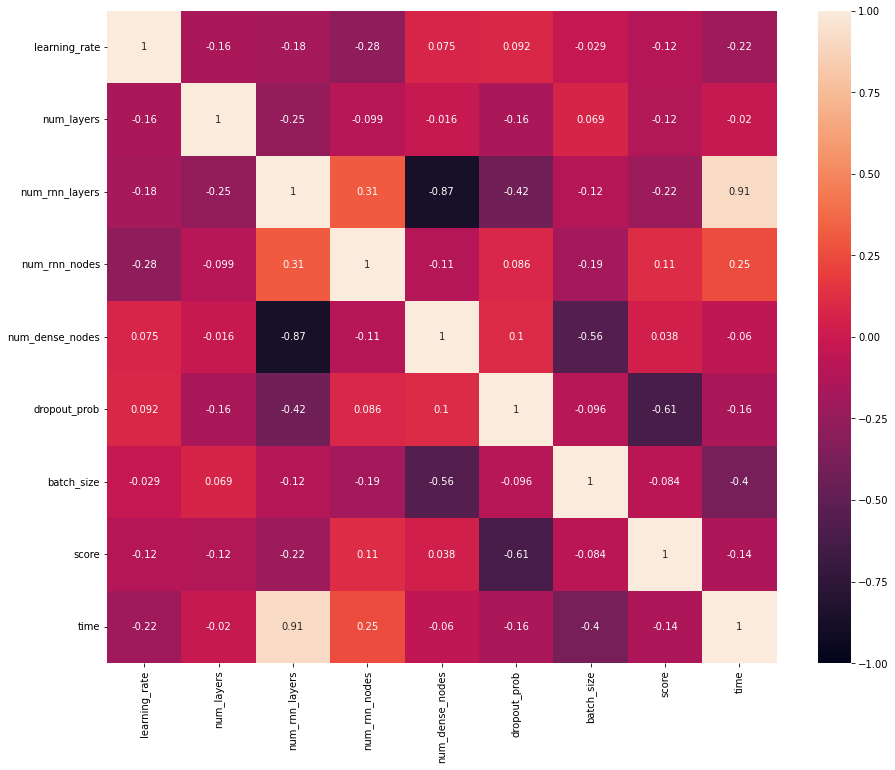

In [185]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(best_hyperparameters_rnn.merge(auprc_scores_val_auprc, on=['model_name', 'split']).drop(columns=['horizon', 'split']).corr(), annot=True, ax=ax, vmin=-1, vmax=1)
plt.yticks(rotation=0) 
plt.savefig('images/corr_hiperparams_rnn.png', bbox_inches='tight')
plt.show()

In [149]:
best_hyperparameters_rnn.describe()

,learning_rate,num_layers,num_rnn_layers,num_rnn_nodes,num_dense_nodes,dropout_prob,batch_size,split
count,30.000000,18.000000,12.000000,30.000000,18.000000,12.000000,30.000000,30.000000
mean,0.000182,3.500000,0.916667,97.333333,82.166667,0.318863,90.533333,1.000000
std,0.000346,1.689065,1.729862,33.298372,34.024645,0.334116,24.095690,0.830455
min,0.000010,1.000000,0.000000,44.000000,44.000000,0.000000,64.000000,0.000000
25%,0.000010,1.500000,0.000000,65.000000,44.000000,0.096487,64.500000,0.000000
50%,0.000023,4.000000,0.000000,111.500000,79.500000,0.173112,90.000000,1.000000
75%,0.000054,5.000000,1.000000,128.000000,115.000000,0.537403,112.500000,2.000000
max,0.001000,5.000000,5.000000,128.000000,128.000000,0.990000,128.000000,2.000000


In [182]:
best_hyperparameters_rnn['learning_rate'].quantile([0.89])

0.89    0.000927
Name: learning_rate, dtype: float64

------------------------------

In [133]:
def plot_learning_curves(early_stopping_monitor, savepath=None, show=True):
    splits = [0,1,2]

    files_folder_path = f'./images/train/{early_stopping_monitor}'

    rows_limit = 10
    figsize = (20,40)

    i = 0
    total = 0
    suptitles = ['gru_stacked', 'gru_denses_stacked_dropout', 'lstm_denses_stacked_dropout', 'baseline_lstm', 'gru_stacked_denses_stacked_dropout', 'lstm_stacked_denses_stacked_dropout', 'gru_denses_stacked', 'lstm_stacked', 'baseline_gru', 'lstm_denses_stacked']

    fig, axs = plt.subplots(rows_limit, 3, figsize=figsize, constrained_layout=False)
    # subfigs = fig.subfigures(nrows=rows_limit, ncols=1, hspace=4)
    # for row, subfig in enumerate(subfigs):
    #     subfig.suptitle(suptitles[row])

    # left = 0.1
    # bottom = 0.1
    # right = 0.9
    # top = 1
    # wspace = 0.4
    # hspace = 1

    # plt.subplots_adjust(left=left,
    #                     bottom=bottom, 
    #                     right=right, 
    #                     top=top,
    #                     wspace=wspace, 
    #                     hspace=hspace)

    for folder in os.listdir(files_folder_path):

        if i==rows_limit:
            plt.show()

            fig, axs = plt.subplots(rows_limit, 3, figsize=figsize, constrained_layout=False)
            # subfigs = fig.subfigures(nrows=rows_limit, ncols=1, hspace=.75)
            # for row, subfig in enumerate(subfigs):
            #     subfig.suptitle(f'{folder}')

            # plt.subplots_adjust(left=left,
            #             bottom=bottom, 
            #             right=right, 
            #             top=top,
            #             wspace=wspace, 
            #             hspace=hspace)

            i=0
        
        for split in splits:
            
            train_loss_path = f'train_loss_split_{split}.csv'
            train_loss = pd.read_csv(f'{files_folder_path}/{folder}/{train_loss_path}')

            validation_loss_path = f'validation_loss_split_{split}.csv'
            validation_loss = pd.read_csv(f'{files_folder_path}/{folder}/{validation_loss_path}')

            if folder == 'gru_denses_stacked_dropout' and split==1:
                axs[i, split].plot(train_loss['Step'], train_loss['Value'], label='Validación', color='tab:orange')
                axs[i, split].plot(validation_loss['Step'], validation_loss['Value'], label='Entrenamiento', color='tab:blue')
            elif folder == 'lstm_denses_stacked_dropout' and split==2:
                axs[i, split].plot(train_loss['Step'], train_loss['Value'], label='Validación', color='tab:orange')
                axs[i, split].plot(validation_loss['Step'], validation_loss['Value'], label='Entrenamiento', color='tab:blue')
            elif folder == 'gru_stacked_denses_stacked_dropout' and (split==0 or split==1):
                axs[i, split].plot(train_loss['Step'], train_loss['Value'], label='Validación', color='tab:orange')
                axs[i, split].plot(validation_loss['Step'], validation_loss['Value'], label='Entrenamiento', color='tab:blue')
            else:
                axs[i, split].plot(train_loss['Step'], train_loss['Value'], label='Entrenamiento', color='tab:blue')
                axs[i, split].plot(validation_loss['Step'], validation_loss['Value'], label='Validación', color='tab:orange')

            if split==1:
                axs[i, split].set_title(f'{folder}')
            
            axs[i,split].set_xlabel('Step')
            axs[i, split].set_ylabel('Loss')
            fig.subplots_adjust(hspace=0.35)
        
        total += 1
        i+=1

    fig.legend(['Entrenamiento', 'Validación'], loc='lower center', bbox_to_anchor=(0.5125, 0.1), ncol=2)
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    if show:
        plt.show()

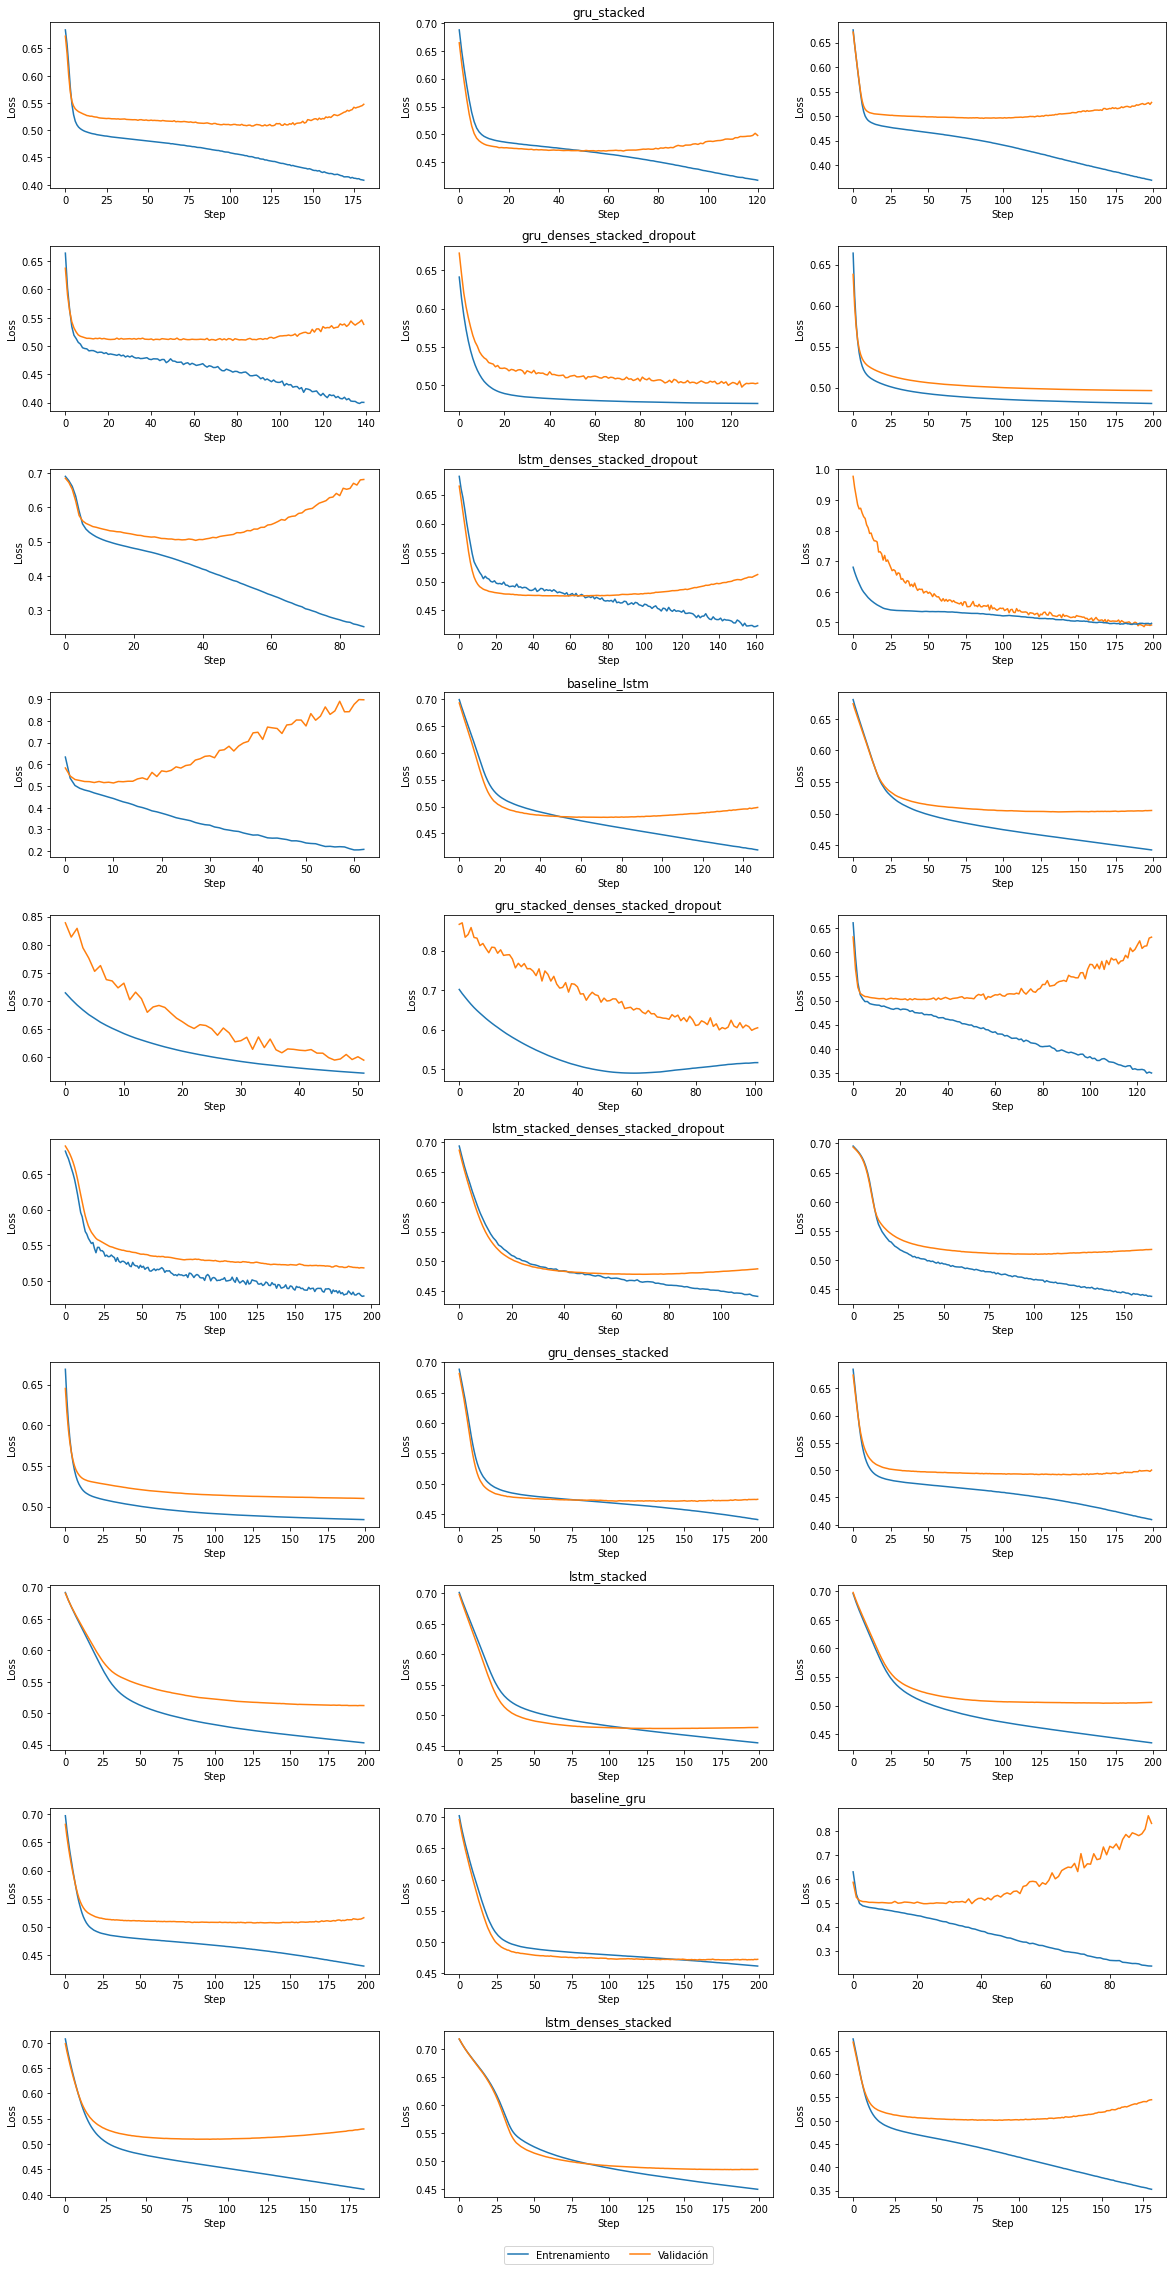

In [134]:
plot_learning_curves('val_auprc', savepath='images/loss_training_rnn_val_auprc.png')

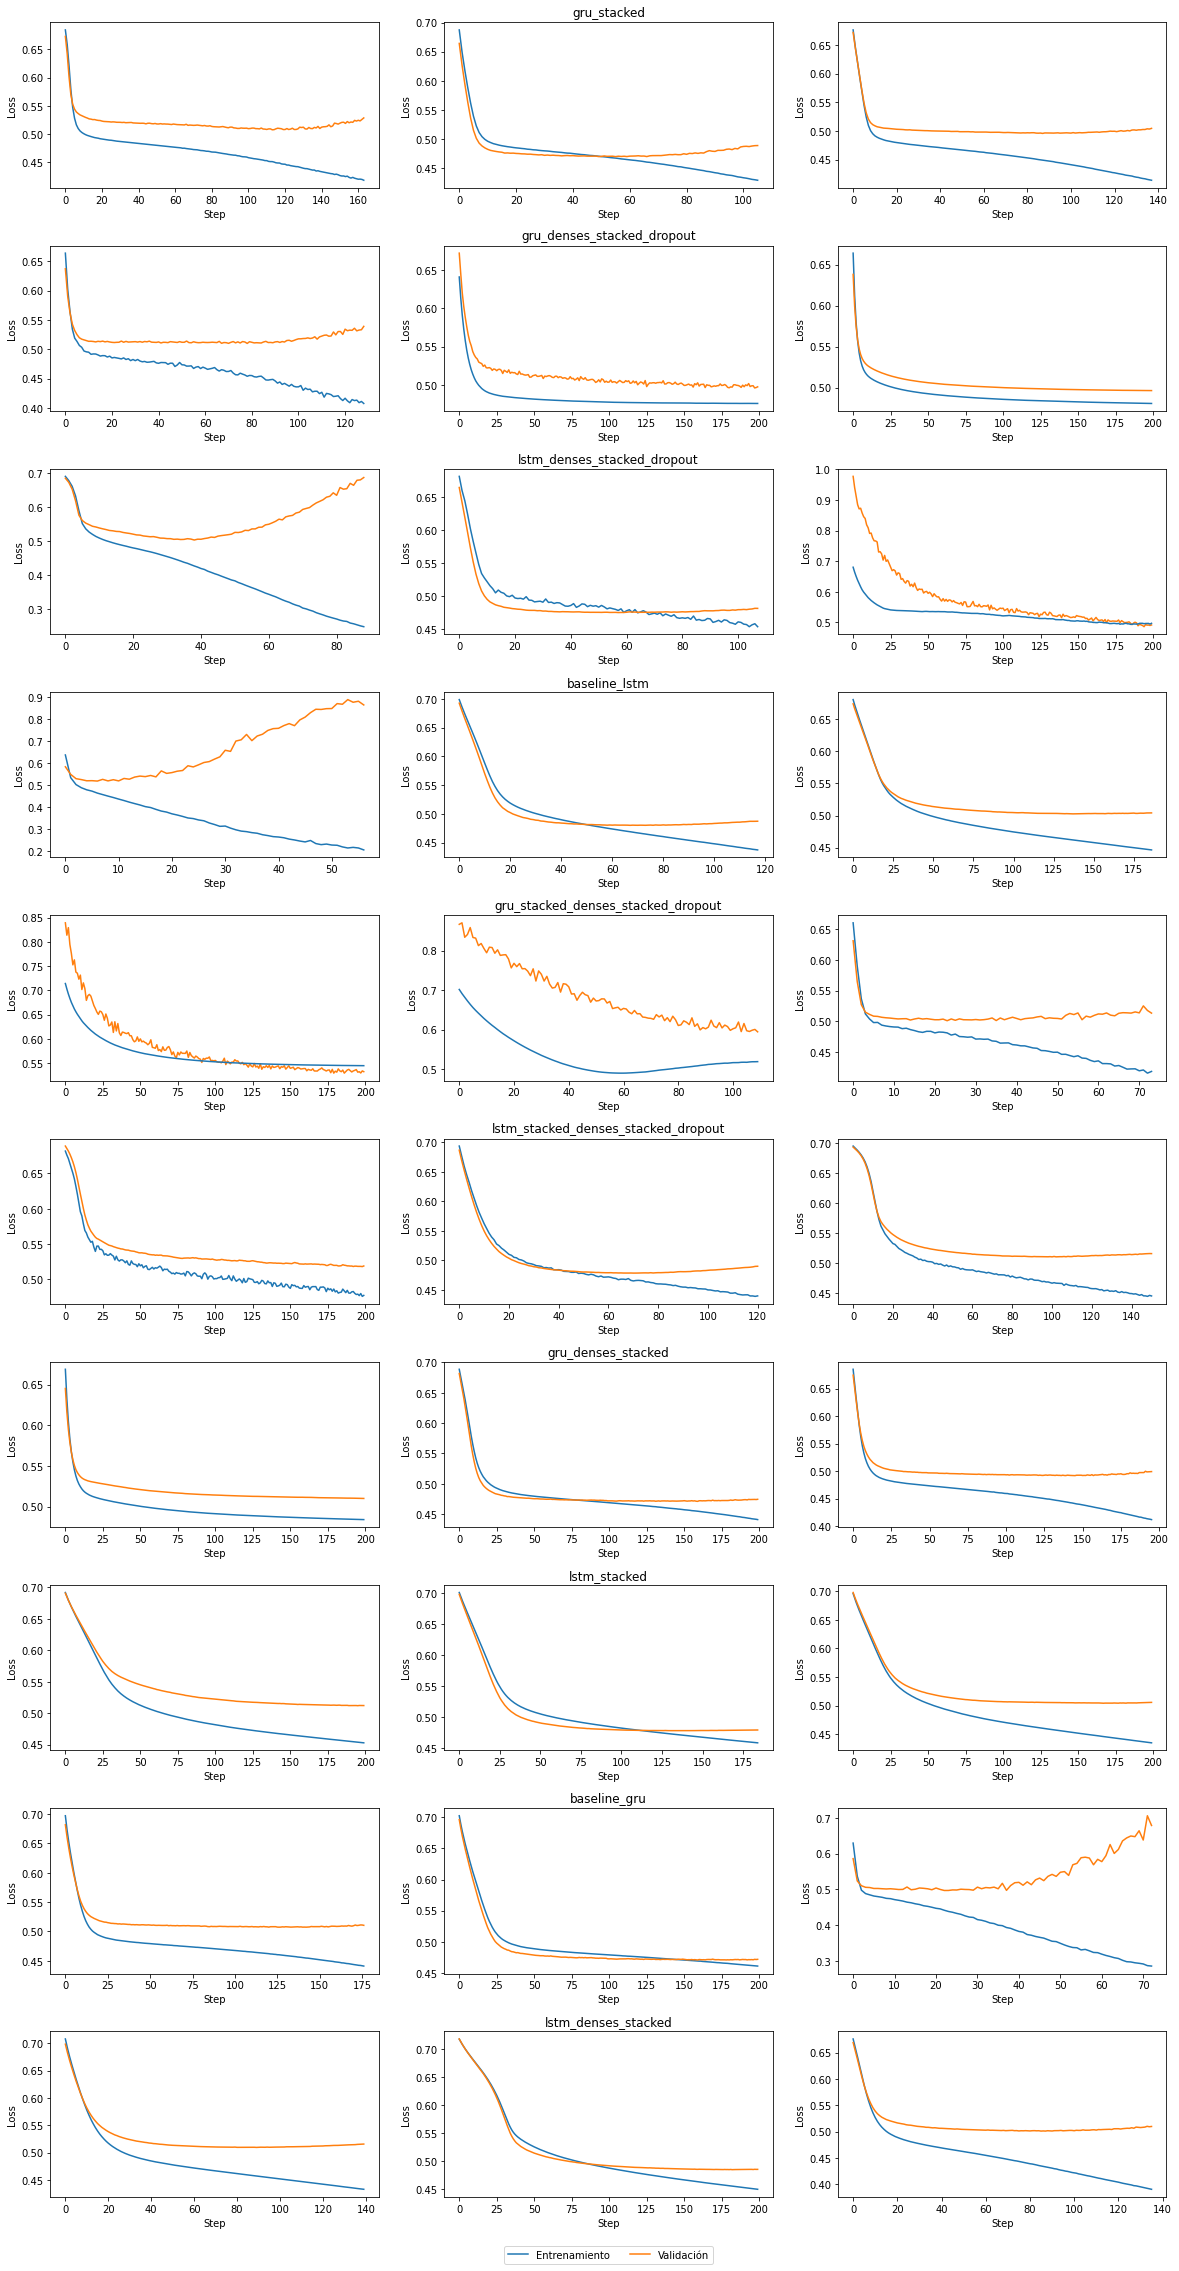

In [135]:
plot_learning_curves('val_loss', savepath='images/loss_training_rnn_val_logloss.png', show=False)

--------------------

In [45]:
hyperparam_opt_times = pd.read_csv('output/rnn/hyperparam_opt_times.csv')
hyperparam_opt_times

,model,split,time
0,baseline_lstm,0,1678.594716
1,baseline_gru,0,2138.435594
2,lstm_stacked_denses,0,1058.040990
3,gru_stacked_denses,0,1837.102185
4,lstm_stacked_denses_dropout,0,973.637783
5,gru_stacked_denses_dropout,0,1350.508839
6,lstm_stacked,0,3853.669830
7,gru_stacked,0,2816.231944
8,lstm_stacked_denses_stacked_dropout,0,3838.753013
9,gru_stacked_denses_stacked_dropout,0,2566.945020


In [14]:
# Get time in minutes (it is in seconds)
hyperparam_opt_times['time'] = hyperparam_opt_times['time'] / 60
# hyperparam_opt_times.groupby('model').sum()
hyperparam_opt_times.sort_values(by=['model', 'split'])

,model,split,time
1,baseline_gru,0,35.640593
11,baseline_gru,1,32.951835
21,baseline_gru,2,23.435761
0,baseline_lstm,0,27.976579
10,baseline_lstm,1,36.282743
20,baseline_lstm,2,35.529357
7,gru_stacked,0,46.937199
17,gru_stacked,1,61.550848
27,gru_stacked,2,57.824335
3,gru_stacked_denses,0,30.618370


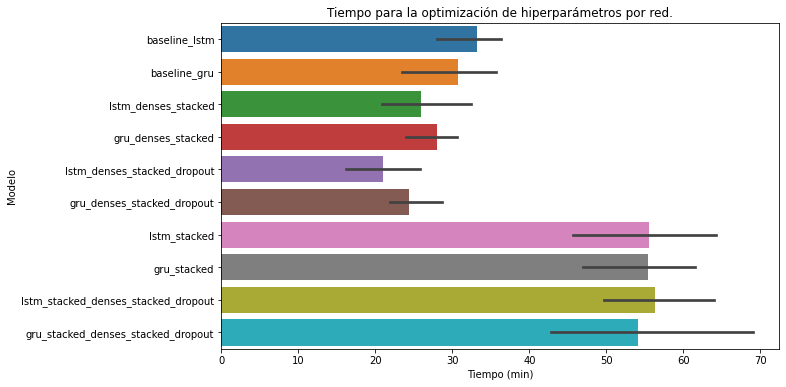

In [57]:
# Plot time for each model and split
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='time', y='model', data=hyperparam_opt_times)

plt.title('Tiempo para la optimización de hiperparámetros por red.')
plt.xlabel('Tiempo (min)')
plt.ylabel('Modelo')

# Change y axis labels names
ax.set_yticklabels(['baseline_lstm', 'baseline_gru', 'lstm_denses_stacked', 'gru_denses_stacked', 'lstm_denses_stacked_dropout', 'gru_denses_stacked_dropout', 'lstm_stacked', 'gru_stacked', 'lstm_stacked_denses_stacked_dropout', 'gru_stacked_denses_stacked_dropout'])

# handles, labels = ax.get_legend_handles_labels()
# labels = ['baseline_lstm', 'baseline_gru', 'lstm_denses_stacked', 'gru_denses_stacked', 'lstm_denses_stacked_dropout', 'gru_denses_stacked_dropout', 'lstm_stacked', 'gru_stacked', 'lstm_stacked_denses_stacked_dropout', 'gru_stacked_denses_stacked_dropout']
# plt.legend(handles, labels, bbox_to_anchor=(1, 0.75), ncol=1, title='Modelo')

# plt.savefig('images/hyperparam_opt_times_per_model.png', bbox_inches='tight')
plt.show()

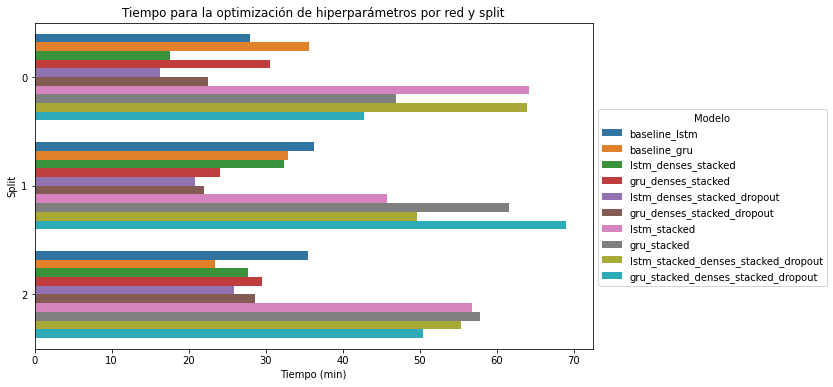

In [48]:
# Plot time for each model and split
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='time', y='split', hue='model', data=hyperparam_opt_times, orient='h')

plt.title('Tiempo para la optimización de hiperparámetros por red y split')
plt.xlabel('Tiempo (min)')
plt.ylabel('Split')

handles, labels = ax.get_legend_handles_labels()
labels = ['baseline_lstm', 'baseline_gru', 'lstm_denses_stacked', 'gru_denses_stacked', 'lstm_denses_stacked_dropout', 'gru_denses_stacked_dropout', 'lstm_stacked', 'gru_stacked', 'lstm_stacked_denses_stacked_dropout', 'gru_stacked_denses_stacked_dropout']
plt.legend(handles, labels, bbox_to_anchor=(1, 0.75), ncol=1, title='Modelo')

# plt.savefig('images/hyperparam_opt_times.png', bbox_inches='tight')
plt.show()

--------------

In [193]:
rnn_scores_val_auprc = pd.read_csv('output/rnn/scores_val_auprc.csv')
auprc_scores_val_auprc = rnn_scores_val_auprc[rnn_scores_val_auprc['score_type']=='auprc']
aucroc_scores_val_auprc = rnn_scores_val_auprc[rnn_scores_val_auprc['score_type']=='aucroc']
rnn_scores_val_auprc

,model_type,horizon,split,score_type,score,time
0,baseline_lstm,7,0,auprc,0.397490,28.654578
1,baseline_lstm,6,0,auprc,0.397490,28.654578
2,baseline_lstm,5,0,auprc,0.397462,28.654578
3,baseline_lstm,4,0,auprc,0.397490,28.654578
4,baseline_lstm,3,0,auprc,0.397490,28.654578
...,...,...,...,...,...,...
475,gru_stacked_denses_stacked_dropout,4,2,aucroc,0.643119,210.883436
476,gru_stacked_denses_stacked_dropout,3,2,aucroc,0.643135,210.883436
477,gru_stacked_denses_stacked_dropout,2,2,aucroc,0.643135,210.883436
478,gru_stacked_denses_stacked_dropout,1,2,aucroc,0.643135,210.883436


In [71]:
rnn_scores_val_loss = pd.read_csv('output/rnn/scores_val_loss.csv')
auprc_scores_val_loss = rnn_scores_val_loss[rnn_scores_val_loss['score_type']=='auprc']
aucroc_scores_val_loss = rnn_scores_val_loss[rnn_scores_val_loss['score_type']=='aucroc']
rnn_scores_val_loss

,model_type,horizon,split,score_type,score,time
0,baseline_lstm,7,0,auprc,0.405475,27.324878
1,baseline_lstm,6,0,auprc,0.405475,27.324878
2,baseline_lstm,5,0,auprc,0.405434,27.324878
3,baseline_lstm,4,0,auprc,0.405475,27.324878
4,baseline_lstm,3,0,auprc,0.405475,27.324878
...,...,...,...,...,...,...
475,gru_stacked_denses_stacked_dropout,4,2,aucroc,0.686354,118.996316
476,gru_stacked_denses_stacked_dropout,3,2,aucroc,0.686386,118.996316
477,gru_stacked_denses_stacked_dropout,2,2,aucroc,0.686386,118.996316
478,gru_stacked_denses_stacked_dropout,1,2,aucroc,0.686386,118.996316


# Scores

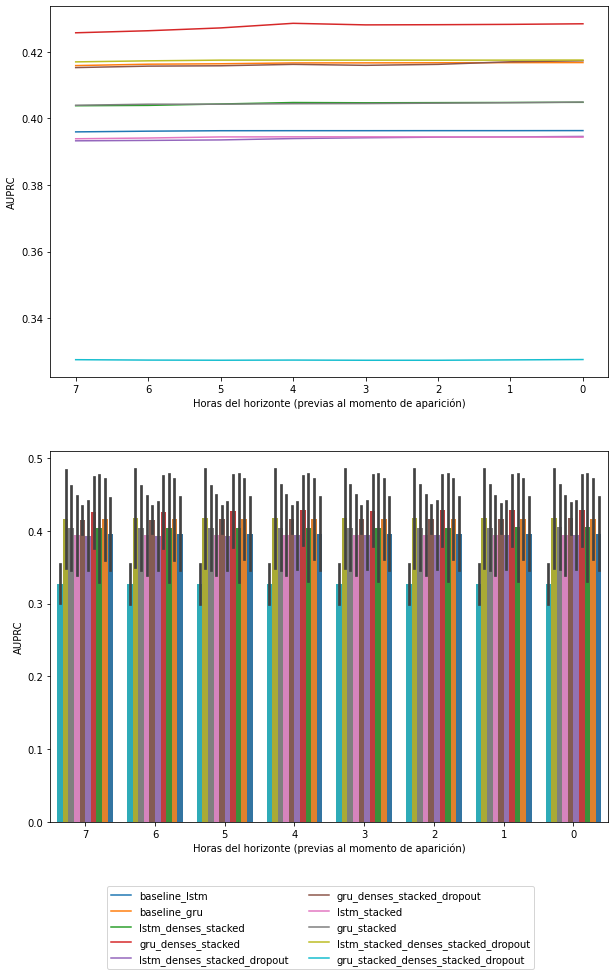

In [138]:
fig, axs = plt.subplots(2, 1, figsize=(10,15))
sns.lineplot(x='horizon', y='score', hue='model_type', data=auprc_scores_val_auprc, ci=None, ax=axs[0])
axs[0].invert_xaxis()
axs[0].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[0].set_ylabel('AUPRC')
axs[0].get_legend().remove()

sns.barplot(x='horizon', y='score', hue='model_type', data=auprc_scores_val_auprc, ci='sd', ax=axs[1])
axs[1].invert_xaxis()
axs[1].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[1].set_ylabel('AUPRC')
axs[1].get_legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
# labels = ['Modelo base-line', 'Modelo AUPRC', 'Modelo AUPRC media', 'Modelo AUPRC  decr.', 'Modelo AUPRC crec.']
labels = ['baseline_lstm', 'baseline_gru', 'lstm_denses_stacked', 'gru_denses_stacked', 'lstm_denses_stacked_dropout', 'gru_denses_stacked_dropout', 'lstm_stacked', 'gru_stacked', 'lstm_stacked_denses_stacked_dropout', 'gru_stacked_denses_stacked_dropout']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.07), ncol=2)

plt.savefig('images/lineplot_barplot_auprc_rnn.png', bbox_inches='tight')
plt.show()

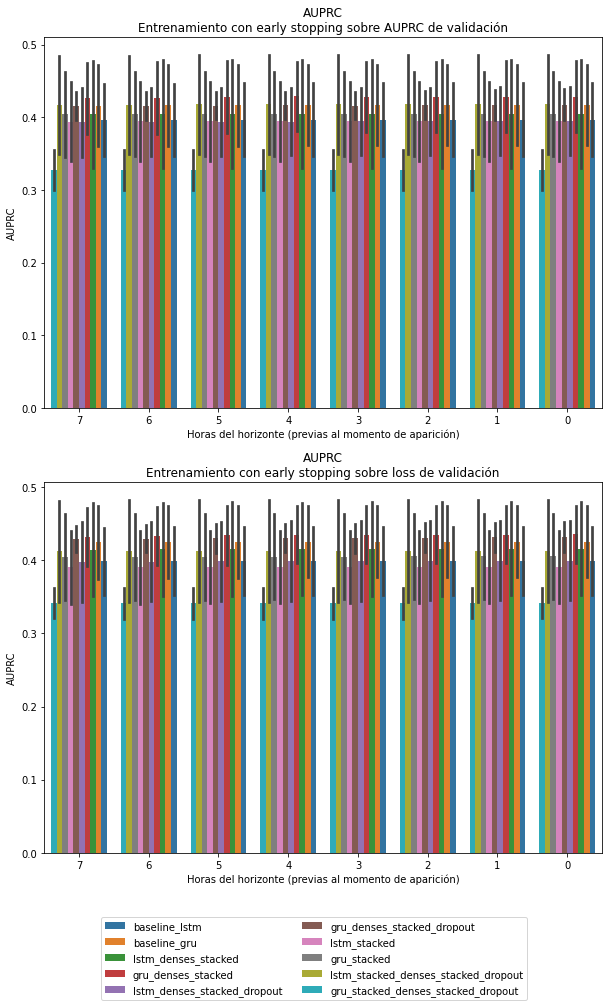

In [82]:
fig, axs = plt.subplots(2, 1, figsize=(10,15))
sns.barplot(x='horizon', y='score', hue='model_type', data=auprc_scores_val_auprc, ci='sd', ax=axs[0])
axs[0].invert_xaxis()
axs[0].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[0].set_ylabel('AUPRC')
axs[0].set_title('AUPRC\nEntrenamiento con early stopping sobre AUPRC de validación')
axs[0].get_legend().remove()

sns.barplot(x='horizon', y='score', hue='model_type', data=auprc_scores_val_loss, ci='sd', ax=axs[1])
axs[1].invert_xaxis()
axs[1].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[1].set_ylabel('AUPRC')
axs[1].set_title('AUPRC\nEntrenamiento con early stopping sobre loss de validación')
axs[1].get_legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
# labels = ['Modelo base-line', 'Modelo AUPRC', 'Modelo AUPRC media', 'Modelo AUPRC  decr.', 'Modelo AUPRC crec.']
labels = ['baseline_lstm', 'baseline_gru', 'lstm_denses_stacked', 'gru_denses_stacked', 'lstm_denses_stacked_dropout', 'gru_denses_stacked_dropout', 'lstm_stacked', 'gru_stacked', 'lstm_stacked_denses_stacked_dropout', 'gru_stacked_denses_stacked_dropout']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.07), ncol=2)

# plt.savefig('images/lineplot_barplot_auprc_rnn.png', bbox_inches='tight')
plt.show()

# Times

In [194]:
rnn_scores_val_auprc['time'] = rnn_scores_val_auprc['time'] / 60
rnn_scores_val_loss['time'] = rnn_scores_val_loss['time'] / 60

In [195]:
rnn_scores_val_auprc.groupby('model_type').head(1)

,model_type,horizon,split,score_type,score,time
0,baseline_lstm,7,0,auprc,0.397490,0.477576
16,baseline_gru,7,0,auprc,0.406260,1.928333
32,lstm_stacked_denses,7,0,auprc,0.398585,1.901161
48,gru_stacked_denses,7,0,auprc,0.448044,1.634018
64,lstm_stacked_denses_dropout,7,0,auprc,0.396242,0.698720
80,gru_stacked_denses_dropout,7,0,auprc,0.442507,1.143992
96,lstm_stacked,7,0,auprc,0.387467,1.493038
112,gru_stacked,7,0,auprc,0.362494,6.629066
128,lstm_stacked_denses_stacked_dropout,7,0,auprc,0.399902,2.844263
144,gru_stacked_denses_stacked_dropout,7,0,auprc,0.289219,0.452111


In [196]:
rnn_scores_val_loss.groupby('model_type').head(1)

,model_type,horizon,split,score_type,score,time
0,baseline_lstm,7,0,auprc,0.405475,0.007590
16,baseline_gru,7,0,auprc,0.417831,0.029528
32,lstm_stacked_denses,7,0,auprc,0.404248,0.024186
48,gru_stacked_denses,7,0,auprc,0.448044,0.026148
64,lstm_stacked_denses_dropout,7,0,auprc,0.392709,0.012132
80,gru_stacked_denses_dropout,7,0,auprc,0.436320,0.017449
96,lstm_stacked,7,0,auprc,0.387467,0.023650
112,gru_stacked,7,0,auprc,0.359175,0.099442
128,lstm_stacked_denses_stacked_dropout,7,0,auprc,0.385054,0.047336
144,gru_stacked_denses_stacked_dropout,7,0,auprc,0.312063,0.025961


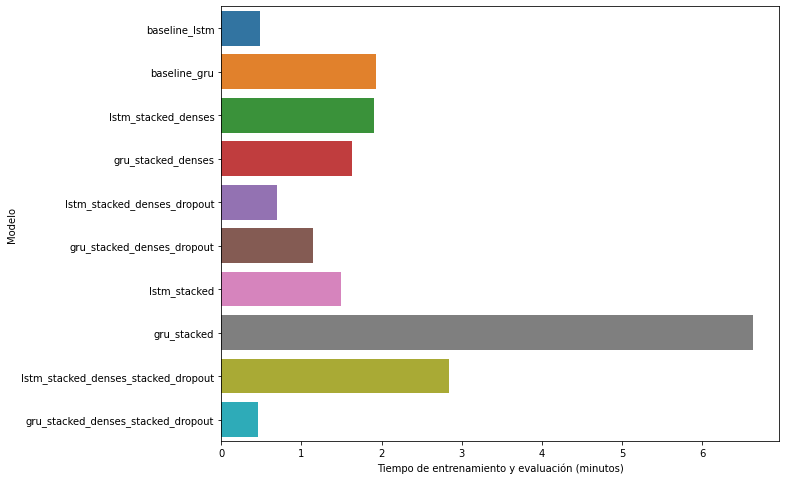

In [199]:
# 2x1 subplots
fig, ax = plt.subplots(1, 1, figsize=(10,8))

sns.barplot(x='time', y='model_type', data=rnn_scores_val_auprc.groupby('model_type').head(1))
ax.set_xlabel('Tiempo de entrenamiento y evaluación (minutos)')
ax.set_ylabel('Modelo')
plt.savefig('images/train_test_time_rnn.png', bbox_inches='tight')
plt.show()

-------------------

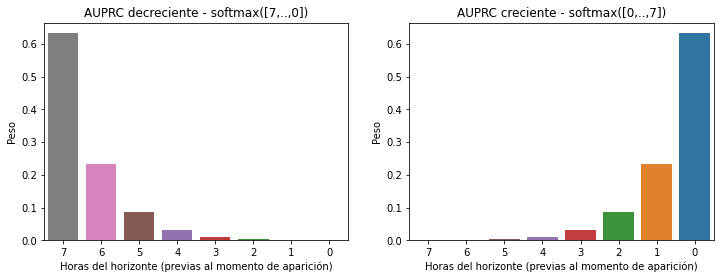

In [34]:
horizons = list(range(7, -1, -1))

decreasing_weights = softmax([horizon for horizon in horizons])
increasing_weights = softmax([horizon for horizon in horizons][::-1])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x=[7,6,5,4,3,2,1,0], y=decreasing_weights, ax=axes[0])
axes[0].invert_xaxis()
axes[0].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axes[0].set_ylabel('Peso')

sns.barplot(x=list(range(7, -1, -1)), y=increasing_weights, ax=axes[1])
axes[1].invert_xaxis()
axes[1].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axes[1].set_ylabel('Peso')

axes[0].set_title('AUPRC decreciente - softmax([7,..,0])')
axes[1].set_title('AUPRC creciente - softmax([0,..,7])')

# plt.savefig('images/auprc_weights.png', bbox_inches='tight')
plt.show()

---------------------------

In [20]:
import pickle

# Load pickle file
def load_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [21]:
tvt_info_split_0 = load_pickle('output/tvt_info_split_0.pkl')
tvt_info_split_1 = load_pickle('output/tvt_info_split_1.pkl')
tvt_info_split_2 = load_pickle('output/tvt_info_split_2.pkl')

In [22]:
len(tvt_info_split_0['test']), len(tvt_info_split_1['test']), len(tvt_info_split_2['test'])

(620, 620, 620)

In [23]:
len(np.intersect1d(tvt_info_split_0['test'], tvt_info_split_1['test'])), len(np.intersect1d(tvt_info_split_0['test'], tvt_info_split_2['test'])), len(np.intersect1d(tvt_info_split_1['test'], tvt_info_split_2['test']))

(59, 63, 61)

In [24]:
63*100/620

10.161290322580646

---------------------

In [91]:
clockify_times = pd.read_csv('/home/acampillos/Downloads/Clockify_Time_Report_Summary_01_01_2022-31_12_2022.csv')
clockify_times

,Tag,Description,Time (h),Time (decimal),Amount (USD)
0,Adquisición y procesamiento de los datos,(Without description),23:54:58,23.916111,0.0
1,Análisis exploratorio de los datos,(Without description),40:05:51,40.097500,0.0
2,Entrenamiento y ajuste de los modelos,(Without description),86:05:00,86.083333,0.0
3,Escritura de la memoria,(Without description),87:36:29,87.608056,0.0
4,Estudio del estado del arte,(Without description),31:00:00,31.000000,0.0
5,Estudio teórico/práctico e investigación,(Without description),32:42:32,32.708889,0.0
6,Planificación,(Without description),10:00:00,10.000000,0.0


In [92]:
clockify_times = clockify_times.drop(columns=['Description', 'Time (h)', 'Amount (USD)'], axis=1)
clockify_times.columns = ['tarea', 'tiempo real']
clockify_times['tiempo previsto'] = [10, 40, 80, 90, 30, 35, 15]

In [93]:
clockify_times_sns_format = []
for index, row in clockify_times.iterrows():
    clockify_times_sns_format.append([row['tarea'], row['tiempo previsto'], 'Planificado'])
    clockify_times_sns_format.append([row['tarea'], row['tiempo real'], 'Real'])

clockify_times_sns_format = pd.DataFrame(clockify_times_sns_format, columns=['Tarea', 'Tiempo total', 'Tiempo'])
clockify_times_sns_format

,Tarea,Tiempo total,Tiempo
0,Adquisición y procesamiento de los datos,10.000000,Planificado
1,Adquisición y procesamiento de los datos,23.916111,Real
2,Análisis exploratorio de los datos,40.000000,Planificado
3,Análisis exploratorio de los datos,40.097500,Real
4,Entrenamiento y ajuste de los modelos,80.000000,Planificado
5,Entrenamiento y ajuste de los modelos,86.083333,Real
6,Escritura de la memoria,90.000000,Planificado
7,Escritura de la memoria,87.608056,Real
8,Estudio del estado del arte,30.000000,Planificado
9,Estudio del estado del arte,31.000000,Real


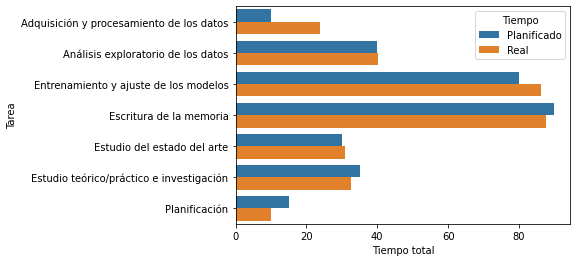

In [94]:
sns.barplot(x='Tiempo total', y='Tarea', hue='Tiempo', data=clockify_times_sns_format, orient='h')
# plt.savefig('images/desviacion_temporal_tareas_clockify.png', bbox_inches='tight')
plt.show()

In [95]:
difference = clockify_times.copy()
difference['Desviación'] = difference['tiempo real'] - difference['tiempo previsto'] 
difference.columns = ['Tarea', 'Tiempo real', 'Tiempo previsto', 'Desviación']
difference

,Tarea,Tiempo real,Tiempo previsto,Desviación
0,Adquisición y procesamiento de los datos,23.916111,10,13.916111
1,Análisis exploratorio de los datos,40.097500,40,0.097500
2,Entrenamiento y ajuste de los modelos,86.083333,80,6.083333
3,Escritura de la memoria,87.608056,90,-2.391944
4,Estudio del estado del arte,31.000000,30,1.000000
5,Estudio teórico/práctico e investigación,32.708889,35,-2.291111
6,Planificación,10.000000,15,-5.000000


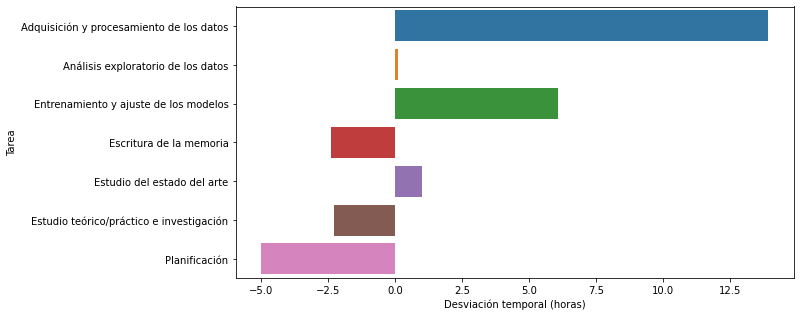

In [96]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

sns.barplot(data=difference, x='Desviación', y='Tarea', 
            orient='horizontal', ax=ax)
ax.set_xlabel('Desviación temporal (horas)')

# plt.savefig('images/desviacion_temporal_tareas_clockify.png', bbox_inches='tight')
plt.show()

-----------------------------

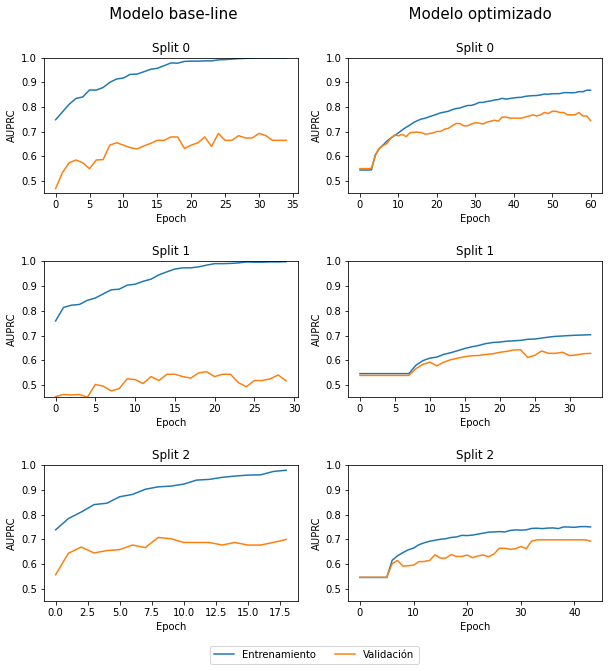

In [199]:
splits = [0,1,2]
fig, axs = plt.subplots(3, 2, figsize=(10,10))
plt.setp(axs, ylim=(0.45, 1))

for split in splits:
    with open(f'output/xgboost/results/evals_split_{split}_model_baseline.json') as json_file:
        baseline_evals = json.load(json_file)
    with open(f'output/xgboost/results/evals_split_{split}_model_tuned.json') as json_file:
        tuned_evals = json.load(json_file)

    axs[split, 0].plot(range(len(baseline_evals['validation_0']['auprc'])), list(map(lambda x: -x, baseline_evals['validation_0']['auprc'])), label='Entrenamiento')
    axs[split, 0].plot(range(len(baseline_evals['validation_1']['auprc'])), list(map(lambda x: -x, baseline_evals['validation_1']['auprc'])), label='Validación')
    axs[split, 0].set_xlabel('Epoch')
    axs[split, 0].set_ylabel('AUPRC')

    axs[split, 1].plot(range(len(tuned_evals['validation_0']['auprc'])), list(map(lambda x: -x, tuned_evals['validation_0']['auprc'])), label='Entrenamiento')
    axs[split, 1].plot(range(len(tuned_evals['validation_0']['auprc'])), list(map(lambda x: -x, tuned_evals['validation_1']['auprc'])), label='Validación')
    axs[split, 1].set_xlabel('Epoch')
    axs[split, 1].set_ylabel('AUPRC')

    axs[split, 0].set_title(f'Split {split}')
    axs[split, 1].set_title(f'Split {split}')

    handles, labels = axs[split, 1].get_legend_handles_labels()

fig.suptitle('       Modelo base-line                                    Modelo optimizado', fontsize=15, y=0.95)
fig.subplots_adjust(hspace=.5)

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.07), ncol=2)
# plt.savefig('images/auprc_training_xgboost.png', bbox_inches='tight')
plt.show()

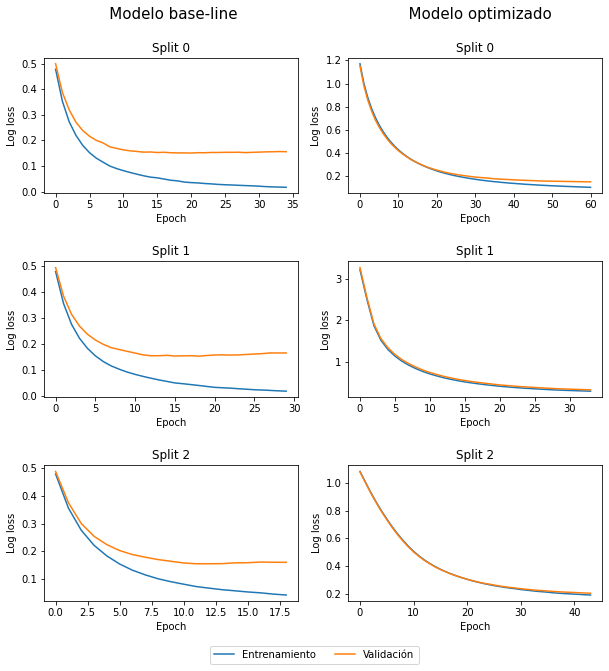

In [204]:
splits = [0,1,2]
fig, axs = plt.subplots(3, 2, figsize=(10,10))
# plt.setp(axs, ylim=(0.45, 1))

for split in splits:
    with open(f'output/xgboost/results/evals_split_{split}_model_baseline.json') as json_file:
        baseline_evals = json.load(json_file)
    with open(f'output/xgboost/results/evals_split_{split}_model_tuned.json') as json_file:
        tuned_evals = json.load(json_file)

    axs[split, 0].plot(range(len(baseline_evals['validation_0']['logloss'])), list(map(lambda x: x, baseline_evals['validation_0']['logloss'])), label='Entrenamiento')
    axs[split, 0].plot(range(len(baseline_evals['validation_1']['logloss'])), list(map(lambda x: x, baseline_evals['validation_1']['logloss'])), label='Validación')
    axs[split, 0].set_xlabel('Epoch')
    axs[split, 0].set_ylabel('Log loss')

    axs[split, 1].plot(range(len(tuned_evals['validation_0']['logloss'])), list(map(lambda x: x, tuned_evals['validation_0']['logloss'])), label='Entrenamiento')
    axs[split, 1].plot(range(len(tuned_evals['validation_0']['logloss'])), list(map(lambda x: x, tuned_evals['validation_1']['logloss'])), label='Validación')
    axs[split, 1].set_xlabel('Epoch')
    axs[split, 1].set_ylabel('Log loss')

    axs[split, 0].set_title(f'Split {split}')
    axs[split, 1].set_title(f'Split {split}')

    handles, labels = axs[split, 1].get_legend_handles_labels()

fig.suptitle('       Modelo base-line                                    Modelo optimizado', fontsize=15, y=0.95)
fig.subplots_adjust(hspace=.5)

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.07), ncol=2)
plt.savefig('images/logloss_training_xgboost.png', bbox_inches='tight')
plt.show()

-------------------------

In [205]:
vitals_features = ['sysbp', 'diabp', 'meanbp', 'resprate', 'heartrate',
    'spo2_pulsoxy', 'tempc', 'cardiacoutput', 'tvset', 'tvobserved',
    'tvspontaneous', 'peakinsppressure', 'totalpeeplevel', 'o2flow',
    'fio2']
labs_features = ['albumin', 'bands', 'bicarbonate', 'bilirubin',
    'creatinine', 'chloride', 'glucose', 'hematocrit', 'hemoglobin',
    'lactate', 'platelet', 'potassium', 'ptt', 'inr', 'pt', 'sodium',
    'bun', 'wbc', 'creatinekinase', 'ck_mb', 'fibrinogen', 'ldh',
    'magnesium', 'calcium_free', 'po2_bloodgas', 'ph_bloodgas',
    'pco2_bloodgas', 'so2_bloodgas', 'troponin_t']
all_features = vitals_features + labs_features

In [207]:
feature_importances = pd.read_csv('output/xgboost/results/feature_importances.csv')
full_labvitals = pd.read_csv('output/full_labvitals_horizon_0_dropped_short.csv')

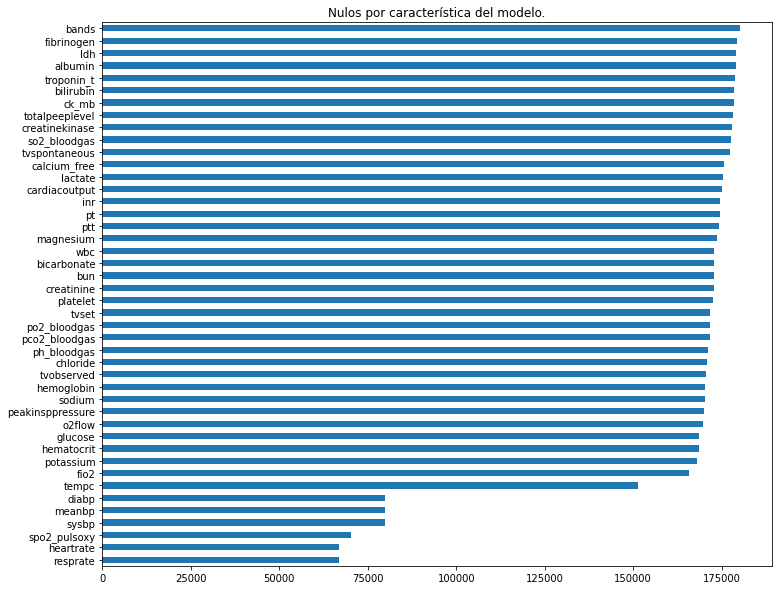

In [208]:
nulls = full_labvitals[all_features].isnull().sum()
# Plot nulls in ascending order
nulls.sort_values(ascending=True, inplace=True)
nulls.plot(kind='barh', figsize=(12, 10))
plt.title('Nulos por característica del modelo.')
# plt.savefig('images/eda/nulls_lab_vital.png', bbox_inches='tight')
plt.show()

In [209]:
feature_importances['nulls'] = feature_importances['feature'].map(nulls)

In [210]:
# Create 3 empty columns for score_weight, score_gain and score_cover
feature_importances['score_weight'] = 0
feature_importances['score_gain'] = 0
feature_importances['score_cover'] = 0

# For each row set a score in these columns based on the importance_type
for index, row in feature_importances.iterrows():
    if row['importance_type'] == 'weight':
        feature_importances.loc[index, 'score_weight'] = row['score']
    elif row['importance_type'] == 'gain':
        feature_importances.loc[index, 'score_gain'] = row['score']
    elif row['importance_type'] == 'cover':
        feature_importances.loc[index, 'score_cover'] = row['score']

feature_importances = feature_importances.drop(columns=['score'])

In [211]:
feature_importances['feature'] = feature_importances['feature'].astype('category').cat.codes
feature_importances['importance_type'] = feature_importances['importance_type'].astype('category').cat.codes
feature_importances

,importance_type,feature,nulls,score_weight,score_gain,score_cover
0,2,7,NaN,7.000000,0.0,0.000000
1,2,37,79926.0,41.333333,0.0,0.000000
2,2,12,79955.0,15.444444,0.0,0.000000
3,2,23,79952.0,21.555556,0.0,0.000000
4,2,33,66745.0,21.777778,0.0,0.000000
...,...,...,...,...,...,...
130,0,29,171626.0,0.000000,0.0,1463.177481
131,0,27,171173.0,0.000000,0.0,1109.396033
132,0,25,171625.0,0.000000,0.0,1527.912771
133,0,34,177582.0,0.000000,0.0,888.795293


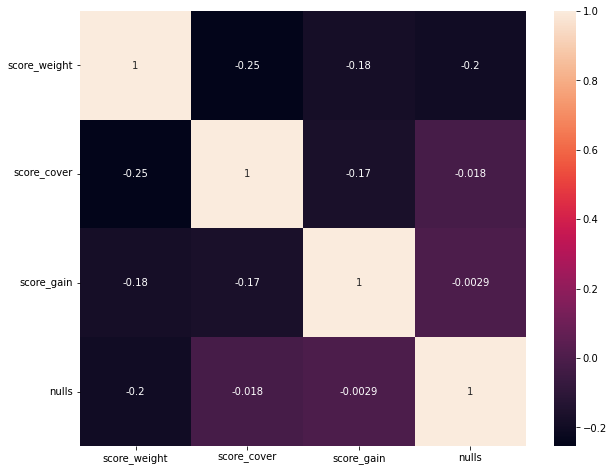

In [213]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(feature_importances[['score_weight', 'score_cover', 'score_gain', 'nulls']].corr(), annot=True, ax=ax)
plt.yticks(rotation=0)
# plt.savefig('images/corr_xgboost.png', bbox_inches='tight')
plt.show()

---------------------------------------------

In [28]:
xgboost_scores = pd.read_csv('output/xgboost/results/scores.csv')
xgboost_scores

,model_type,horizon,split,score_type,score
0,Baseline,7,0,auprc,0.620399
1,Baseline,6,0,auprc,0.613806
2,Baseline,5,0,auprc,0.580496
3,Baseline,4,0,auprc,0.625493
4,Baseline,3,0,auprc,0.613656
...,...,...,...,...,...
235,Reversed softmax,4,2,aucroc,0.665112
236,Reversed softmax,3,2,aucroc,0.665185
237,Reversed softmax,2,2,aucroc,0.721753
238,Reversed softmax,1,2,aucroc,0.739581


In [29]:
auprc_scores = xgboost_scores[xgboost_scores['score_type']=='auprc']
aucroc_scores = xgboost_scores[xgboost_scores['score_type']=='aucroc']

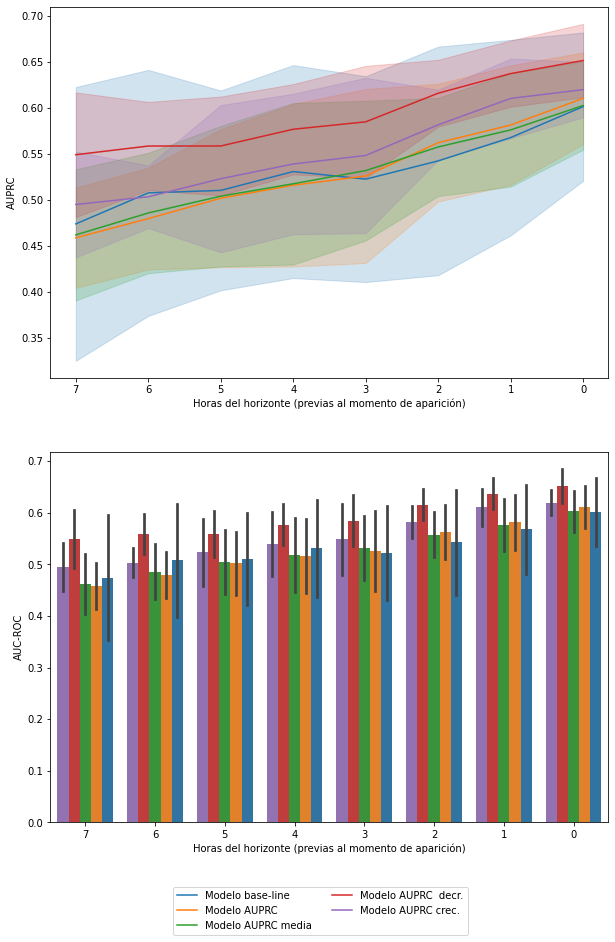

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(10,15))
sns.lineplot(x='horizon', y='score', hue='model_type', data=auprc_scores, ci='sd', n_boot=10000, ax=axs[0])
axs[0].invert_xaxis()
axs[0].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[0].set_ylabel('AUPRC')
axs[0].get_legend().remove()

# sns.lineplot(x='horizon', y='score', hue='model_type', data=aucroc_scores, ci='sd', n_boot=10000, ax=axs[1])
sns.barplot(x='horizon', y='score', hue='model_type', data=auprc_scores, ci='sd', ax=axs[1])
axs[1].invert_xaxis()
axs[1].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[1].set_ylabel('AUC-ROC')
axs[1].get_legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
labels = ['Modelo base-line', 'Modelo AUPRC', 'Modelo AUPRC media', 'Modelo AUPRC  decr.', 'Modelo AUPRC crec.']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.07), ncol=2)

# plt.savefig('images/lineplot_barplot_auprc_xgboost.png', bbox_inches='tight')
plt.show()

--------------

In [20]:
rnn_scores = pd.read_csv('output/rnn/scores_copia_con_todos.csv')
rnn_scores

,model_type,horizon,split,score_type,score,time
0,Baseline LSTM,7,0,auprc,0.432845,98.228962
1,Baseline LSTM,6,0,auprc,0.432885,98.228962
2,Baseline LSTM,5,0,auprc,0.432943,98.228962
3,Baseline LSTM,4,0,auprc,0.433416,98.228962
4,Baseline LSTM,3,0,auprc,0.434046,98.228962
...,...,...,...,...,...,...
379,GRU (val_loss),4,2,aucroc,0.685020,348.096473
380,GRU (val_loss),3,2,aucroc,0.685083,348.096473
381,GRU (val_loss),2,2,aucroc,0.685083,348.096473
382,GRU (val_loss),1,2,aucroc,0.685083,348.096473


In [21]:
auprc_scores = rnn_scores[rnn_scores['score_type']=='auprc']
aucroc_scores = rnn_scores[rnn_scores['score_type']=='aucroc']

In [16]:
auprc_scores = auprc_scores[auprc_scores['model_type'].str.contains('(val_loss)') == False]
aucroc_scores = aucroc_scores[aucroc_scores['model_type'].str.contains('(val_loss)') == False]

/tmp/ipykernel_27705/3118418870.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  aucroc_scores = aucroc_scores[aucroc_scores['model_type'].str.contains('(val_loss)') == False]


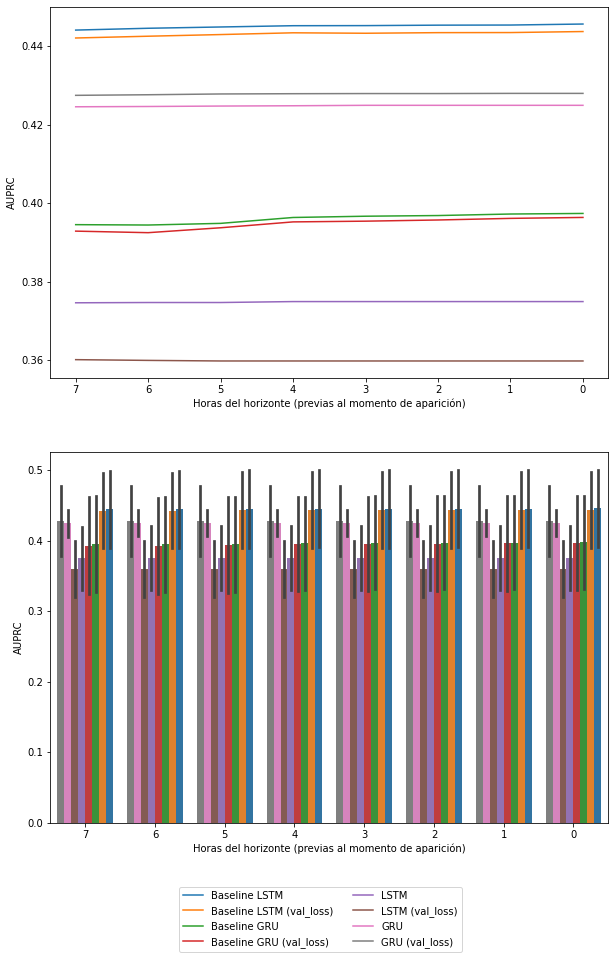

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(10,15))
sns.lineplot(x='horizon', y='score', hue='model_type', data=auprc_scores, ci=None, n_boot=10000, ax=axs[0])
axs[0].invert_xaxis()
axs[0].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[0].set_ylabel('AUPRC')
axs[0].get_legend().remove()

# sns.lineplot(x='horizon', y='score', hue='model_type', data=aucroc_scores, ci='sd', n_boot=10000, ax=axs[1])
sns.barplot(x='horizon', y='score', hue='model_type', data=auprc_scores, ci='sd', ax=axs[1])
axs[1].invert_xaxis()
axs[1].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[1].set_ylabel('AUPRC')
axs[1].get_legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
# labels = ['Modelo base-line', 'Modelo AUPRC', 'Modelo AUPRC media', 'Modelo AUPRC  decr.', 'Modelo AUPRC crec.']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.07), ncol=2)

# plt.savefig('images/lineplot_barplot_auprc_xgboost.png', bbox_inches='tight')
plt.show()

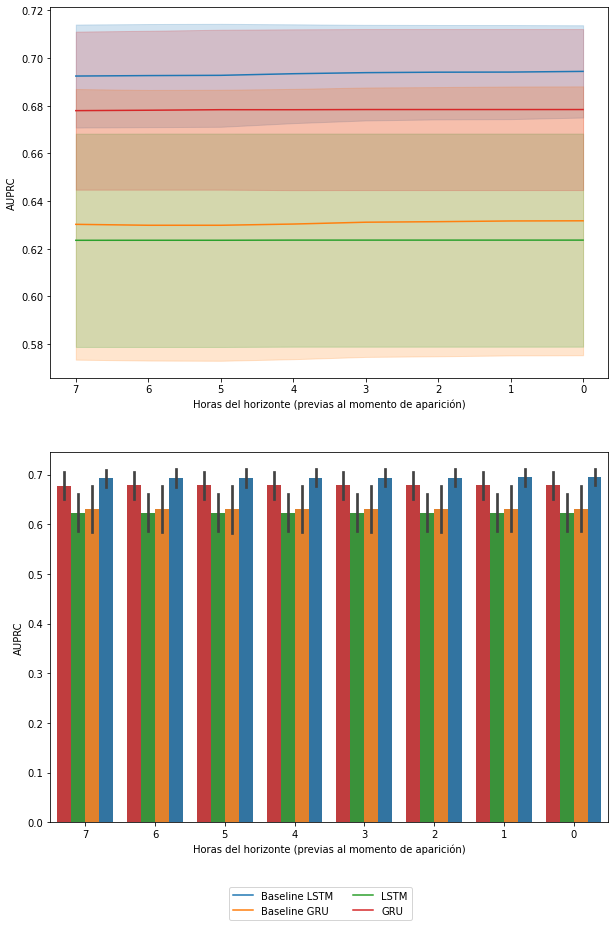

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10,15))
sns.lineplot(x='horizon', y='score', hue='model_type', data=aucroc_scores, ci='sd', n_boot=10000, ax=axs[0])
axs[0].invert_xaxis()
axs[0].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[0].set_ylabel('AUPRC')
axs[0].get_legend().remove()

# sns.lineplot(x='horizon', y='score', hue='model_type', data=aucroc_scores, ci='sd', n_boot=10000, ax=axs[1])
sns.barplot(x='horizon', y='score', hue='model_type', data=aucroc_scores, ci='sd', ax=axs[1])
axs[1].invert_xaxis()
axs[1].set_xlabel('Horas del horizonte (previas al momento de aparición)')
axs[1].set_ylabel('AUPRC')
axs[1].get_legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
# labels = ['Modelo base-line', 'Modelo AUPRC', 'Modelo AUPRC media', 'Modelo AUPRC  decr.', 'Modelo AUPRC crec.']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.07), ncol=2)

# plt.savefig('images/lineplot_barplot_auprc_xgboost.png', bbox_inches='tight')
plt.show()

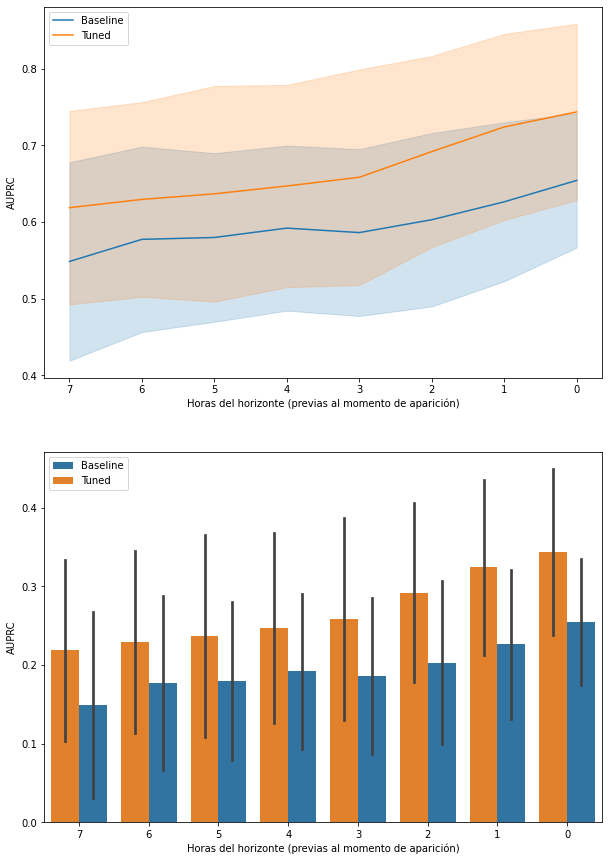

In [18]:
# fig, axs = plt.subplots(2, figsize=(10,15))
# sns.lineplot(x='horizon', y='score', hue='model_type', data=xgboost_scores, ci='sd', n_boot=10000, ax=axs[0])
# axs[0].invert_xaxis()
# axs[0].set_xlabel('Horas del horizonte (previas al momento de aparición)')
# axs[0].set_ylabel('AUPRC')
# axs[0].legend(loc='upper left')

# auprc_scores_averaged_thres = xgboost_scores.copy()
# auprc_scores_averaged_thres['score'] -= 0.4

# sns.barplot(x='horizon', y='score', hue='model_type', data=auprc_scores_averaged_thres, ci='sd', ax=axs[1])
# axs[1].invert_xaxis()
# axs[1].set_xlabel('Horas del horizonte (previas al momento de aparición)')
# axs[1].set_ylabel('AUPRC')
# axs[1].legend(loc='upper left')

# # plt.savefig('images/lineplot_barplot_auprc_xgboost.png', bbox_inches='tight')
# plt.show()